An Exploration of the TensorFlow Tensor  -by Xueyang Ding (This notebook is done by myself, has copyright)

In this jupyter notebook, I will give brief introduction about TensorFlow library, focusing on Tensor, from simple usage to complex usage

What is tensorflow: TensorFlow is an open-source software library released by Google for dataflow programming, especially on deep learning on NN.
What is tensor: I think tensor is like a vector, or a N-dimension arrays, it can be seen as a data structure to represent all data. And only tensors are passed between operations.
What is flow: tensor(data) flows through computation graph...so called tensorflow...
Two main sections of tf core programs: Building a computational graph. Running a computational graph.

Some terms in tensorflow:
Graph: it is used to represent computing tasks, as well as some of the operations.
Session: when a session is established, an empty map is generated, one session can create several graphs
Tensor: as talked above, it is a data structure used in tensorflow
Constant: constant, to record data or status, cannot be modified.
Feed and Fetch: as arbitrary operations to assign or derive data, like shovels.

Data types in tensorflow:
in tensorflow there is no need to specify the tensor data type, it will automatically assign to the correct type. But sometimes change type can save memory. The types are listed below:
tf.float32: 32 bits floating point.
tf.float64: 64 bits floating point.
tf.int8: 8 bits integer.
tf.int16: 16 bits integer.
tf.int32: 32 bits integer.
tf.int64: 64 bits integer.
tf.uint8: 8 bits unsigned integer.
tf.string: Variable length byte arrays.
tf.bool: Boolean.

Now let's starting on explanation by coding~

In [2]:
import numpy as np
import tensorflow as tf

In [3]:
# Firstly start with simplest constant() function, used to define constants
# buliding a graph
node1 = tf.constant(1.0,tf.float32)   # create a constant node1, with value 3.0, type is declared as float32
node2 = tf.constant(2.0)              # create a constant node2, with value 4.0, type is automatically declared as float32
node3 = tf.constant(3)                # create a constant node2, with value 4, type is automatically declared as int32
print(node1,node2,node3)              # the output is just abstract tensor, no actual calculations

Tensor("Const:0", shape=(), dtype=float32) Tensor("Const_1:0", shape=(), dtype=float32) Tensor("Const_2:0", shape=(), dtype=int32)


In [4]:
# running a graph, note that the graph needs to be runned in a session (can based on CPUs or GPUs)!
s1 = tf.Session()                                  # create a session object
print(s1.run([node1,node2,node3]))                 # run the results, start computation
s1.close()                                         # release these resources when they are no longer required

[1.0, 2.0, 3]


In [5]:
# Another way to do above thing, with session automatically closed
with tf.Session() as s1:
    output = s1.run([node1,node2,node3])
print(output)

[1.0, 2.0, 3]


In [6]:
# Simple Arithmetic operation examples~
node1 = tf.constant(3)
node2 = tf.constant(4)
a = node1 + node2         # similar as tf.add(node1,node2)
b = node1 - node2         # similar as tf.subtract(node1,node2)
c = node1 * node2         # similar as tf.multiply(node1,node2)
d = node1 / node2         # similar as tf.divide(node1,node2)
e = node1 % node2         # similar as tf.mod(node1,node2)
s1 = tf.Session()
print(s1.run([a,b,c,d,e]))
s1.close()
# there are many other arithmetic operation functions such as tf.pow,tf.sqrt,tf.log ...

[7, -1, 12, 0.75, 3]


In [7]:
# Now let's deal with matrix, still play with constant
m1 = tf.constant([[2,3]])       # create a matrix, shape(1,2):1 row, 2 columns, 
m2 = tf.constant([[2],[3]])     # create a matrix, shape(2,1):2 row, 1 columns,
m3 = tf.constant([1, 2, 3], shape=[3,1])  #shape = [x1,x2,x3...]. x1 to xn means from outer to inner, the number of elements in each layer
m4 = tf.constant([1, 2, 3], shape=[1,3])
s1 = tf.Session()
print(s1.run(tf.matmul(m1,m2)))          # matrix dot product
print(s1.run(tf.matmul(m3,m4)))          # matrix dot product
s1.close()
# sometimes m1+m2, or m3+m4 or use '-', can get a result, but this is different with traditional matrix '+' or '-'!

[[13]]
[[1 2 3]
 [2 4 6]
 [3 6 9]]


The previous statements are all about constant, it takes no inputs, and outputs are always constant. What if a graph wants to external inputs?
The next part is focusing on placeholders. It can be understood as: a placeholder will be used to reserve this place, for further value input

In [19]:
#  create two placeholders a and b, no value initialized
a = tf.placeholder(tf.float32) 
b = tf.placeholder(tf.float32)
add_ab = tf.add(a,b)
s1 = tf.Session()
print(s1.run(add_ab,{a:1,b:2}))           # feed the value a and b
print(s1.run(add_ab,{a:[1,2],b:[3,4]}))   # feed the value a and b
s1.close()


3.0
[4. 6.]


The next part will talk about the variables in tensorflow, in order to train the model, we need changed parameters, for example, each training iteration the parameters will be changed given the feedback. The variables used to hold the updated parameters

In [28]:
# simple linear model explanation
# notice, the variable needs to be initialized
k = tf.Variable([.3],tf.float32)          # create two variables with initialized value 0.3 and -0.3
b = tf.Variable([-.3],tf.float32)
x = tf.placeholder(tf.float32)
linear_model = k * x + b
init = tf.global_variables_initializer()  # initialize variables when this part is run
s1 = tf.Session()
s1.run(init)
print(s1.run(linear_model,{x:[1,2,3,4]}))

[0.         0.3        0.6        0.90000004]


In order to train a model, we need to know the loss, then change to parameter to minimise the loss, here is the example of loss function

In [29]:
# using the example above:
y = tf.placeholder(tf.float32)               # assuming this y is the actual value
squared_diff = tf.square(y - linear_model)   # the squared difference between real value and predicted value
loss = tf.reduce_sum(squared_diff)           # reduce_sum is used to calculate the sum value of input 
print(s1.run(loss,{x:[1,2,3,4],y:[-1,-2,-3,-4]}))

43.260002


In [31]:
# now the variable k and b will be updated in order to reduce the loss using simple gradient descent optimizer, use example above
optimizer = tf.train.GradientDescentOptimizer(0.01)  # it will implement the gradient descent of algorithm,learning rate is 0.01
train = optimizer.minimize(loss)                     # minimise the loss by updating the variables
s1.run(init)
for i in range(1000):                                # train 1000 times
    s1.run(train,{x:[1,2,3,4],y:[-1,-2,-3,-4]})
print(s1.run([k,b]))                                 # optimized k and b value after 1000 trains
s1.close

[array([-0.9999987], dtype=float32), array([-3.871269e-06], dtype=float32)]


<bound method BaseSession.close of <tensorflow.python.client.session.Session object at 0x000002C0269BC908>>

All the things above are simple useage of tensorflow, the next parts will be a little bit complex.
In next part, I will build a simple neural network with TensorFlow to show how it works, and coding a CNN to do image recognition,using dataset from MNIST. MNIST is a simple data set of computer vision, which is composed of the handwritten Arabia digital images. Given the set of training pics, the model will recognize what number in the picture given test pics.
lets start!
Note: the code framework is learnt from the example of CNN from the internet, I learnt CNN model in my ML lecture but this is the first time to coding it using tensorflow.

In [3]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) # I search the website, the one_hot is used for machine to distinguish elements


def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs, keep_prob: 1})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys, keep_prob: 1})
    return result

def weight_variable(shape):                              # Weight initialization function
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)
 
def bias_variable(shape):                               # Bias initialization function, bias used for avoiding 0 gradient
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x,W):                                 # convolution function, set the 1 stride size, 0 padding size
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):                                  # use traditional 2*2 to do max pooling
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

xs = tf.placeholder(tf.float32, [None, 784])/255.   # 28x28
ys = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)
x_image = tf.reshape(xs, [-1, 28, 28, 1])   # x is a 4d vector,28,28 means the width and height, 1 means the color

"""
Convolution calculates 32 characteristics in the patch of each 5x5.
The weight tensor shape of convolution is [5, 5, 1, 32]
"""
# first level of convolution
W_conv1 = weight_variable([5, 5, 1, 32])            
b_conv1 = bias_variable([32])

"""
We then convolve x_image with the weight tensor, add the bias, apply the ReLU function, and finally max pool.
ReLU function is a common activation function
"""
h_conv1 = tf.nn.relu(conv2d(x_image,W_conv1) + b_conv1) 
h_pool1 = max_pool_2x2(h_conv1)

 # second level of convolution
W_conv2 = weight_variable([5, 5, 32, 64])       
b_conv2 = bias_variable([64]) 

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)  # output size 14x14x64
h_pool2 = max_pool_2x2(h_conv2)                           # output size 7x7x64

"""
Now that the picture size is reduced to 7x7, we add a fully connected layer of 1024 neurons to process the entire picture. 
We turn the tensor reshape of the pool layer output into vectors, multiply the weight matrix, add bias, and then use ReLU for it
"""
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

"""
To reduce overfitting, we add dropout before the output layer, dropout will randomly shut down some neurals to force the data
flows to other neruals
"""

h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])      # the output layer
b_fc2 = bias_variable([10])

prediction = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),
                                              reduction_indices=[1]))       # loss
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

sess = tf.Session()

if int((tf.__version__).split('.')[1]) < 12 and int((tf.__version__).split('.')[0]) < 1:
    init = tf.initialize_all_variables()
else:
    init = tf.global_variables_initializer()
sess.run(init)
accuracy = []
training_time = []
for i in range(100):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5})
    if i % 5 == 0:
        training_time.append(i)
        accuracy.append(compute_accuracy(mnist.test.images[:1000], mnist.test.labels[:1000]))
        print('training time',i,' accuracy',compute_accuracy(mnist.test.images[:1000], mnist.test.labels[:1000]))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
training time 0  accuracy 0.141
training time 5  accuracy 0.189
training time 10  accuracy 0.264
training time 15  accuracy 0.481
training time 20  accuracy 0.493
training time 25  accuracy 0.622
training time 30  accuracy 0.653
training time 35  accuracy 0.7
training time 40  accuracy 0.735
training time 45  accuracy 0.732
training time 50  accuracy 0.752
training time 55  accuracy 0.78
training time 60  accuracy 0.795
training time 65  accuracy 0.794
training time 70  accuracy 0.806
training time 75  accuracy 0.811
training time 80  accuracy 0.821
training time 85  accuracy 0.827
training time 90  accuracy 0.84
training time 95  accuracy 0.847


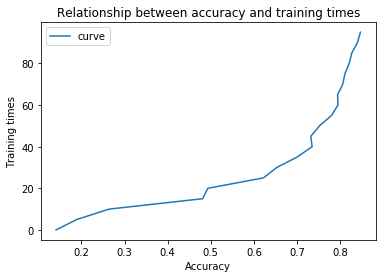

In [9]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('Relationship between accuracy and training times')
plt.xlabel('Accuracy')
plt.ylabel('Training times')
plt.plot(accuracy,training_time,label = 'curve')
plt.legend()
plt.show()